# Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
rng = np.random.RandomState(42)

**Question** Make a set of 1000 randomly drawn data with a multidimensional normal distribution (multivariate) centered in (0,0) of covariance matrix :

$$\left(\begin{array}{cc}2.0 & 1.5\\1.5&2.0\end{array} \right)$$

So it's a random number matrix of 1000 by 2 that you call `data1`. *Help* Look in the `random` module... 

In [3]:
data1 = np.random.multivariate_normal((0,0), np.array([[2.0, 1.5], [1.5, 2.0]]), 1000)
data1

array([[-0.31829397, -1.52538079],
       [ 0.68784072, -0.76098389],
       [ 1.30617305,  1.21395028],
       ...,
       [ 0.6613545 , -0.43188161],
       [ 0.27620274,  0.11297739],
       [ 2.06990635,  3.32278379]])

**Question** Check that the mean and variance are close to what is expected. (You can also try with a larger sample)

In [4]:
np.mean(data1, axis = 0)

array([-0.02891203,  0.03248231])

In [5]:
np.var(data1, axis=0)

array([2.02871785, 2.05307044])

**Question** The matrix `X1` has 1000 rows and 1 column (1000,1) and is the first column of your data. The vector `y1` has dimension (1000,) and is the second column of your data. Define `X1` and `y1` and plot the point cloud

In [6]:
X1 = data1[:, 0].reshape((-1, 1))
X1.shape

(1000, 1)

In [7]:
y1 = data1[:, 1]
y1.shape

(1000,)

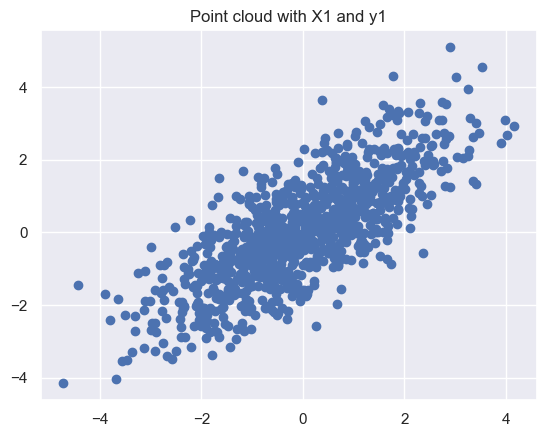

In [8]:
plt.title("Point cloud with X1 and y1")
plt.scatter(X1, y1)

plt.show()

**Question** Make a linear regression model `r1` (without intersection at the origin since the cloud is centered at (0,0) ) and train it with `X1` and `y1`.

In [9]:
from sklearn import linear_model

In [10]:
r1 = linear_model.LinearRegression(fit_intercept=False)

In [11]:
r1.fit(X1, y1)

LinearRegression(fit_intercept=False)

**Question** Observe the coefficient in `r1._coef`

In [12]:
r1.coef_ #wi

array([0.77173184])

**Question** Calculate the predictions of `r` on the data of `X1`. We call this vector `y1_pred`... It's a straight line!

In [13]:
y1_pred = r1.predict(X1)

**Question**  Plot the point cloud with the red line.

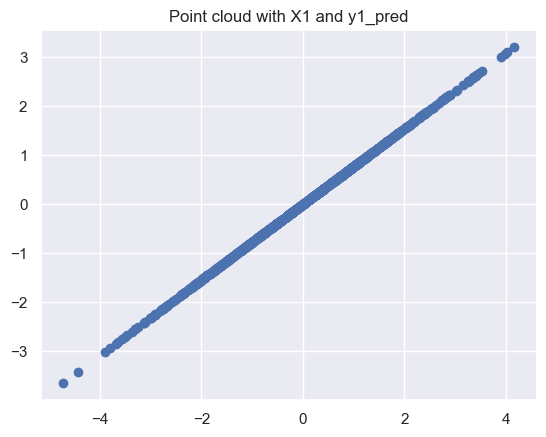

In [14]:
plt.title("Point cloud with X1 and y1_pred")
plt.scatter(X1, y1_pred)

plt.show()

# Analytical solution

Using least squares, we calculate

$$\mathop{\mathrm{argmin}}_a \sum_{x,y\in X_1\times y_1}  (ax - y)^2$$


**Question** On a sheet of paper, develop and calculate the derivative with respect to $a$ and find where the derivative cancels out. 

Take the derivative with respect to \(a\):

$$
\frac{d}{da} \sum (a x - y)^2 = 2\sum x(a x - yx) = 0 
$$

Solve for \(a\):

$$
a = \frac{\sum x y}{\sum x^2}
$$

**Question** Check numerically that you obtain the same result as the coefficient of $r1$.

In [15]:
sum1 =0
sum2 =0

for i in range(X1.size):
    sum1 += X1[i] * y1[i]
    sum2 += X1[i] ** 2

a = sum1 / sum2

print(a)
print(r1.coef_)

[0.77173184]
[0.77173184]


## When the point cloud is no more centered... 

We generate these data again, but this time with data centered in $(3,2)$ for the same covariance matrix. We'll start again, but our analytical calculation is now wrong if we don't take into account the y-intercept...

**Question** Generate the data, plot the data and the regression line as at the start of this tutorial. We call the new objects `data2`, `X2`, `y2`, and `r2`.

In [16]:
data2 = np.random.multivariate_normal((3,2), np.array([[2.0, 1.5], [1.5, 2.0]]), 1000)
data2

array([[3.45940808, 2.56429548],
       [2.70273749, 2.04129393],
       [2.0921565 , 2.61459154],
       ...,
       [1.47571376, 1.63842012],
       [1.51462531, 0.01375878],
       [2.9229714 , 1.2605642 ]])

In [17]:
X2 = data2[:, 0].reshape((-1, 1))
y2 = data2[:, 1]

print(X2.shape)
print(y2.shape)

(1000, 1)
(1000,)


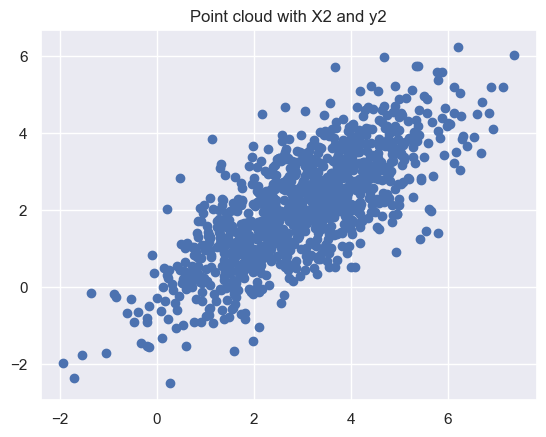

In [18]:
plt.title("Point cloud with X2 and y2")
plt.scatter(X2, y2)

plt.show()

In [19]:
r2 = linear_model.LinearRegression(fit_intercept=True)
r2.fit(X2, y2)
y2_pred = r2.predict(X2)

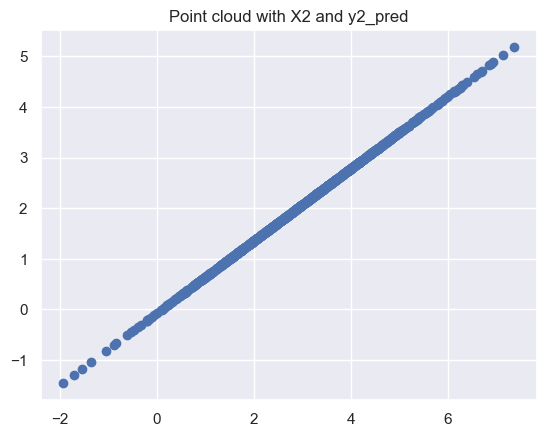

In [20]:
plt.title("Point cloud with X2 and y2_pred")
plt.scatter(X2, y2_pred)

plt.show()

Now, we solve

$$\mathop{\mathrm{argmin}}_{a,b} \sum_{x,y\in X_2\times y_2}  (ax + b - y)^2$$

It a bit more tricky, but still easy if we use the matrix form:

$$\mathop{\mathrm{argmin}}_{a,b} \sum_{x,y\in X_2\times y_2}  (ax + b - y)^2=\mathop{\mathrm{argmin}}_{a,b} \Vert aX_2 + b\mathbf 1 -y_2 \Vert^2$$

where $\mathbf 1$ is a vector of ones (1) of the same dimension than  $X_2$. If $w=(a,b)^\top$ and $X_{2b}$ is $X_2$ plus this column of ones, we have

$$\mathop{\mathrm{argmin}}_{w} \Vert X_{2b}w  -y_2 \Vert^2$$



**Question** Use identity (84) of the matrix cookbook to calculate the derivative.

Assume $W$ is symmetric, then ($x$ and $s$ are vectors and $A$ and $W$ are matrices)
$$\frac{\partial 
(x - As)^\top W (x - As)}{\partial s} = -2A^\top W(x - As)\qquad (84)$$

*Answer* :

$$
J = \|Xw - y\|^2 = (y - Xw)^\top (y - Xw)
$$

We can match identity (84) by setting:

-  x = y 
-  A = X 
-  s = w 
-  W = I  (the identity matrix, which is symmetric)

Then the derivative is:

$$
\frac{dJ}{dw} = -2 X^\top I (y - Xw)
= 2 X^\top (Xw - y)
$$

**Question** Write now the value of $w$ such that this derivative is 0.

We start from the derivative of the loss function:

$$
\frac{dJ}{dw}  = 2 X^\top (Xw - y)
$$

Set the derivative equal to zero (to find the minimum):

$$
2 X^\top (Xw - y) = 0
$$

Divide both sides by 2:

$$
X^\top (Xw - y) = 0
$$

Expand the parentheses:

$$
X^\top X w = X^\top y
$$

Solve for \( w \):

$$
w = (X^\top X)^{-1} X^\top y
$$



**Question** Create a `X2b` matrix accordingly

In [21]:
X2b = np.concatenate([X2, np.ones((X2.shape[0], 1))], axis=1)

print(X2b.shape) 
print(X2b[:5]) 

(1000, 2)
[[3.45940808 1.        ]
 [2.70273749 1.        ]
 [2.0921565  1.        ]
 [3.01402927 1.        ]
 [4.1880255  1.        ]]


**Question** Now solve the system with matrix operators as before.

In [24]:
w = np.linalg.inv(X2b.T @ X2b) @ X2b.T @ y2
(a,b) = w
print(a) #slope
print(b) #intercept


0.7143673201634835
-0.0768599086929037


In [25]:
print(r2.coef_)
print(r2.intercept_)

[0.71436732]
-0.07685990869289894


## Gradient Descent

The previous approach is generalized. The function behind the `argmin` is a so-called **objective function** (or loss function), and the approach is to find the parameters that minimize this loss. 

$$\mathop{\mathrm{argmin}}_{w} f(X, y, w)$$

**Question** What is the objective function of the previous example (the  regression problem for the point cloud centered at $(3,2)$)? (Use the same objects $X_{2b}$ and $y_2$).

*Answer* : $\Vert X_{2b}w  -y_2 \Vert^2$

In the previous case, it works very well because we're minimizing a derivable, convex function, there's a global minimum and an analytical solution. On the other hand, the matrix is quite small because there is little data, but if we have *big data*, it no longer works. Calculating the inverse takes too long.

By taking on more data or more complicated loss functions for which we don't have an analytical solution, we need to change the way we do things... 

Let's start by looking at another way of approaching the analytical solution. The idea here is to follow the slope of the loss function curve. So we calculate the derivative and move in the opposite direction to the derivative in small steps (see [this page](https://www.neural-networks.io/fr/single-layer/gradient-descent.php) for the little drawings that make the point). 

The algorithm therefore starts from a random point (a random value for $w$), calculates the derivative of the objective function (noted $\nabla f$) and modifies $w$ with a small increment that is a factor of this derivative. This factor is called $\eta$.

\begin{equation} w^{(t)} = w^{(t-1)} - \eta\nabla f(X, y, w^{(t-1)})\qquad (\text{Eq. } 1) 
\end{equation}

In the following, we first unroll this algorithm by hand for a single step from $t=0$ to $t=1$, then write the complete algorithm.

### From t=0 to t=1

**Question** Draw at random (numbers between 0 and 1) a 1-d array of size 2 to represent the 2 coefficients $a$ and $b$ of our problem. Call it `w_trans`. Be careful, I call it with the suffix trans because it is a line vector of shape (2,)... It is important to remind that when you do transpositions and multiplications.

In [26]:
w_trans = np.random.rand(2)
w_trans

array([0.16740058, 0.86094094])

**Question** Calculate the value of the objective function for this value of `w_trans`.

In [27]:
obj = np.sum((X2b @ w_trans - y2) ** 2)
obj

np.float64(2010.882019631164)

**Question** Using the previous formula, compute the gradient and call it `nabla`

In [28]:
nabla = 2 * X2b.T @ (X2b @ w_trans - y2)
nabla

array([-6416.65906473, -1365.68066686])

**Question** Set a learning rate `eta` of 0.00005, and calculate the new value of $w$ in `w_trans_suivant` with equation (Eq. 1)

In [30]:
eta = 0.00005 
w_trans_suivant = w_trans - eta * nabla
w_trans_suivant

array([0.48823353, 0.92922498])

**Question** Recalculate the target value in `obj_next` and compare with the target value before performing this gradient step.

In [34]:
obj_next = np.sum((X2b @ w_trans_suivant - y2) ** 2)
print(obj_next)
print(obj)

1120.1327980220624
2010.882019631164


### Algorithm

We now start from the new value and iterate. Overall, the algorithm does : 

```
Initialize w with random values
t = 0
While t < n_iter: 
  Compute the loss function 
  Compute the gradient
  update w following Eq. 1
  t = t + 1
```

**Question** Write this algorithm in a function and try it out with `X2b`, `y2` and `X1`, `y1`.

In [40]:
def regr(X, y, eta=0.00005, n_iter=100, verbose=False):
    """avec verbose=True on peut afficher la valeur de la fonction objectif """
    w = np.random.rand(X.shape[1])
    t = 0
    for t in range(n_iter):
        loss = np.sum((X @ w - y) ** 2)
        gradient = 2 * X.T @ (X @ w - y)
        w = w - eta * gradient

        if verbose and t % 10 == 0:
            print(f"iter {t:4d} | loss = {loss:.6f}")

    return w

In [42]:
regr(X2b, y2, n_iter=1000)

array([ 0.71436732, -0.0768599 ])

In [43]:
regr(X1, y1, n_iter=100)

array([0.77173184])

Setting the learning rate can be tricky...

**Question** Check that the algorithm does not converge to a solution if the step size is too large

In [44]:
regr(X2b, y2, eta=1, n_iter=100, verbose=True)

iter    0 | loss = 1051.602141
iter   10 | loss = 401457803548507940706575698370412632496161935571465381222887809793982039747450671284092928.000000
iter   20 | loss = 1079439053151862510368780092917951260526541907264128196733392321320938455111358651867369866279814104941873181670990743676833499475274650503861844079006599088200934883528991047680.000000
iter   30 | loss = 2902393873453737467218787528979079151730058879412719416492444832825184459189050426487717667661186730110740272688091692588235076074605104861730356429742042111048306028770401596186988625969557182828178784993266935083846113671505697388651810568846557552773264882794496.000000
iter   40 | loss = inf
iter   50 | loss = inf
iter   60 | loss = inf
iter   70 | loss = inf
iter   80 | loss = nan
iter   90 | loss = nan


C:\Users\nomin\AppData\Local\Temp\ipykernel_15620\812915511.py:6: RuntimeWarning: overflow encountered in square
  loss = np.sum((X @ w - y) ** 2)
C:\Users\nomin\AppData\Local\Temp\ipykernel_15620\812915511.py:7: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * X.T @ (X @ w - y)
C:\Users\nomin\AppData\Local\Temp\ipykernel_15620\812915511.py:6: RuntimeWarning: invalid value encountered in matmul
  loss = np.sum((X @ w - y) ** 2)
C:\Users\nomin\AppData\Local\Temp\ipykernel_15620\812915511.py:7: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * X.T @ (X @ w - y)


array([nan, nan])

**Question** A small heuristic is to check whether the objective is decreasing. If so, we can increase the gradient step by 10%; if not, we divide it by 10. 

In [50]:
def regr_tuned(X, y, eta=0.0001, n_iter=100, verbose=False):
    """On règle eta en contrôlant la valeur de l'objectif"""
    w = np.random.rand(X.shape[1])
    t = 0
    loss = 0
    for t in range(n_iter):
        old_loss = loss
        gradient = 2 * X.T @ (X @ w - y)
        w = w - eta * gradient
        loss = np.sum((X @ w - y) ** 2)

        if loss < old_loss:
            eta *= 1.1
        else:
            eta /= 10.0

        if verbose and t % 10 == 0:
            print(f"iter {t:4d} | loss = {loss:.6f} | eta = {eta:.6f}")

    return w

In [51]:
regr_tuned(X2b, y2, eta = 0.01, n_iter=1000, verbose=True)

iter    0 | loss = 5920707.570546 | eta = 0.001000
iter   10 | loss = 7052229.856479 | eta = 0.000021
iter   20 | loss = 1241.655144 | eta = 0.000056
iter   30 | loss = 1074.012858 | eta = 0.000144
iter   40 | loss = 943.091675 | eta = 0.000034
iter   50 | loss = 922.056771 | eta = 0.000088
iter   60 | loss = 905.238371 | eta = 0.000229
iter   70 | loss = 899.657781 | eta = 0.000054
iter   80 | loss = 898.110423 | eta = 0.000140
iter   90 | loss = 897.632474 | eta = 0.000033
iter  100 | loss = 896.607600 | eta = 0.000086
iter  110 | loss = 896.474351 | eta = 0.000222
iter  120 | loss = 896.428713 | eta = 0.000052
iter  130 | loss = 896.415704 | eta = 0.000136
iter  140 | loss = 896.404087 | eta = 0.000352
iter  150 | loss = 896.402220 | eta = 0.000083
iter  160 | loss = 896.401271 | eta = 0.000215
iter  170 | loss = 896.400891 | eta = 0.000051
iter  180 | loss = 896.400813 | eta = 0.000132
iter  190 | loss = 896.400746 | eta = 0.000031
iter  200 | loss = 896.400732 | eta = 0.000081
ite

array([ 0.71436734, -0.07685997])